In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-products/flipkart_com-ecommerce_sample.csv


In [57]:
data = pd.read_csv('/kaggle/input/flipkart-products/flipkart_com-ecommerce_sample.csv')
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [58]:
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go

In [59]:
data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [60]:
data['retail_price'].fillna(data['retail_price'].median(),inplace=True)
data['discounted_price'].fillna(data['discounted_price'].median(),inplace=True)

In [61]:
#calculate the discount percentage
x = data['retail_price'] - data['discounted_price']
y = (x / data['retail_price'])*100
data['dicount_percentage'] = y

In [62]:
#split the datetime.
data['timestamp'] = pd.to_datetime(data['crawl_timestamp'])
data['time'] = data['timestamp'].apply(lambda x : x.time)
data['year'] = data['timestamp'].apply(lambda x : x.year)
data['Month'] = data['timestamp'].apply(lambda x : x.month)
data['date'] = data['timestamp'].apply(lambda x : x.date)
#drop the crawl_timestamp column.
data.drop(['crawl_timestamp'],axis=1,inplace=True)
#now split the product category tree.
data['main_category']=data['product_category_tree'].apply(lambda x :x.split('>>')[0][2:len(x.split('>>')[0])-1])
data['main_category']

0            Clothing
1           Furniture
2            Footwear
3            Clothing
4        Pet Supplies
             ...     
19995       Baby Care
19996       Baby Care
19997       Baby Care
19998       Baby Care
19999       Baby Care
Name: main_category, Length: 20000, dtype: object

In [63]:
# top 10 products and braND.
n =10
top_products = pd.DataFrame(data['main_category'].value_counts() [:n]).reset_index()
top_products.rename(columns = {'index': 'Top_Products','main_category':'Total_count'}, inplace=True)

top_brands = pd.DataFrame(data['brand'].value_counts() [:n]).reset_index()
top_brands.rename(columns = {'index': 'Top_Products','main_category':'Total_count'}, inplace=True)

In [64]:
data.head()

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,overall_rating,brand,product_specifications,dicount_percentage,timestamp,time,year,Month,date,main_category
0,c2d766ca982eca8304150849735ffef9,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.062062,2016-03-25 22:59:23+00:00,22:59:23,2016,3,2016-03-25,Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,...,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.576764,2016-03-25 22:59:23+00:00,22:59:23,2016,3,2016-03-25,Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,...,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050,2016-03-25 22:59:23+00:00,22:59:23,2016,3,2016-03-25,Footwear
3,0973b37acd0c664e3de26e97e5571454,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.802575,2016-03-25 22:59:23+00:00,22:59:23,2016,3,2016-03-25,Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,...,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455,2016-03-25 22:59:23+00:00,22:59:23,2016,3,2016-03-25,Pet Supplies


In [65]:
def secondary_category(value):
    try:
        return value.split('>>')[1][1:len(value.split('>>')[1])-1]
    except IndexError:
        return 'None'       
def tertiary_category(value):
    try:
        return value.split('>>')[2][1:len(value.split('>>')[2])-1]
    except IndexError:
        return 'None'
def quaternary_category(value):
    try:
        return value.split('>>')[3][1:len(value.split('>>')[3])-1]
    except IndexError:
        return 'None'

In [66]:
data['secondary']=data['product_category_tree'].apply(secondary_category)
data['tertiary']=data['product_category_tree'].apply(tertiary_category)
data['quaternary']=data['product_category_tree'].apply(quaternary_category)

In [67]:
data.head()

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,dicount_percentage,timestamp,time,year,Month,date,main_category,secondary,tertiary,quaternary
0,c2d766ca982eca8304150849735ffef9,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,...,62.062062,2016-03-25 22:59:23+00:00,22:59:23,2016,3,2016-03-25,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,...,29.576764,2016-03-25 22:59:23+00:00,22:59:23,2016,3,2016-03-25,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,...,50.050050,2016-03-25 22:59:23+00:00,22:59:23,2016,3,2016-03-25,Footwear,Women's Footwear,Ballerinas,"AW Bellies"""
3,0973b37acd0c664e3de26e97e5571454,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,...,61.802575,2016-03-25 22:59:23+00:00,22:59:23,2016,3,2016-03-25,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,...,4.545455,2016-03-25 22:59:23+00:00,22:59:23,2016,3,2016-03-25,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


Text(0, 0.5, 'Sales')

<Figure size 1000x1000 with 0 Axes>

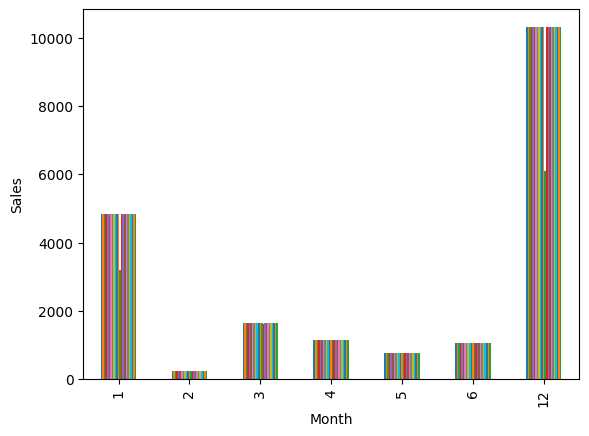

In [68]:
# Sales by Month.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
temp = data.groupby(by='Month',axis=0).count().plot(kind='bar',legend=False)
plt.ylabel('Sales')

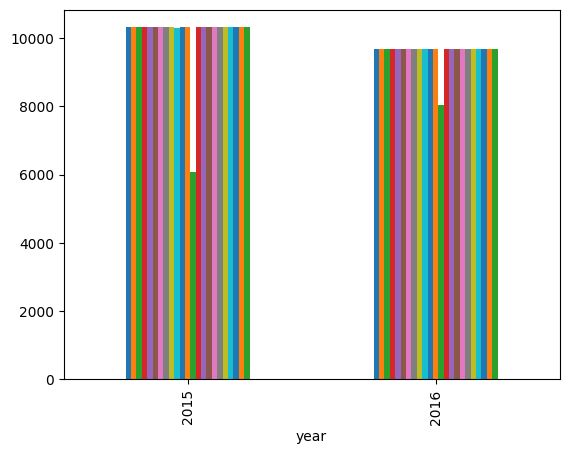

In [70]:
date = data.groupby(by='year',axis=0).count().plot(kind='bar',legend=False)

<Axes: xlabel='main_category'>

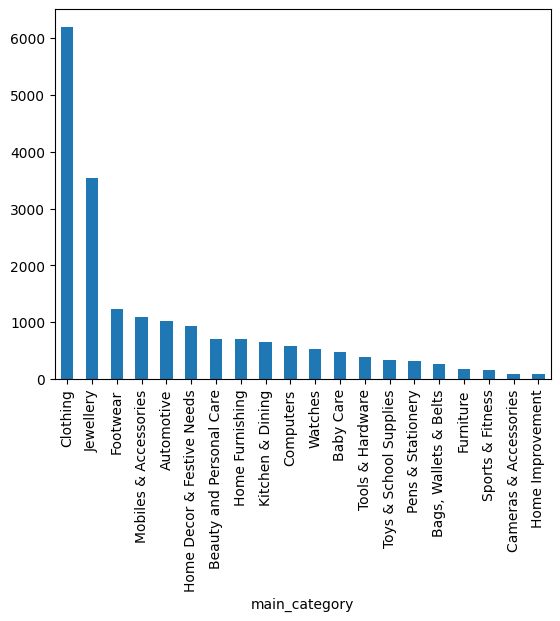

In [74]:
data['main_category'].value_counts()[:20].plot(kind='bar')

In [75]:
data['main_category'].value_counts()[:20]

main_category
Clothing                      6198
Jewellery                     3531
Footwear                      1227
Mobiles & Accessories         1099
Automotive                    1012
Home Decor & Festive Needs     929
Beauty and Personal Care       710
Home Furnishing                700
Kitchen & Dining               647
Computers                      578
Watches                        530
Baby Care                      483
Tools & Hardware               391
Toys & School Supplies         330
Pens & Stationery              313
Bags, Wallets & Belts          265
Furniture                      180
Sports & Fitness               166
Cameras & Accessories           82
Home Improvement                81
Name: count, dtype: int64

<Axes: xlabel='secondary'>

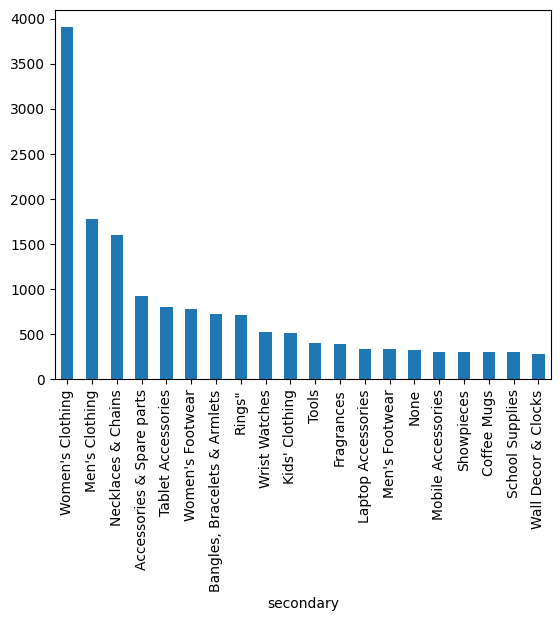

In [76]:
data['secondary'].value_counts()[:20].plot(kind="bar")

In [77]:
data['secondary'].value_counts()[:20]

secondary
Women's Clothing                3901
Men's Clothing                  1773
Necklaces & Chains              1606
Accessories & Spare parts        925
Tablet Accessories               801
Women's Footwear                 781
Bangles, Bracelets & Armlets     724
Rings"                           710
Wrist Watches                    523
Kids' Clothing                   520
Tools                            403
Fragrances                       391
Laptop Accessories               343
Men's Footwear                   340
None                             328
Mobile Accessories               304
Showpieces                       303
Coffee Mugs                      302
School Supplies                  300
Wall Decor & Clocks              278
Name: count, dtype: int64

<Axes: xlabel='tertiary'>

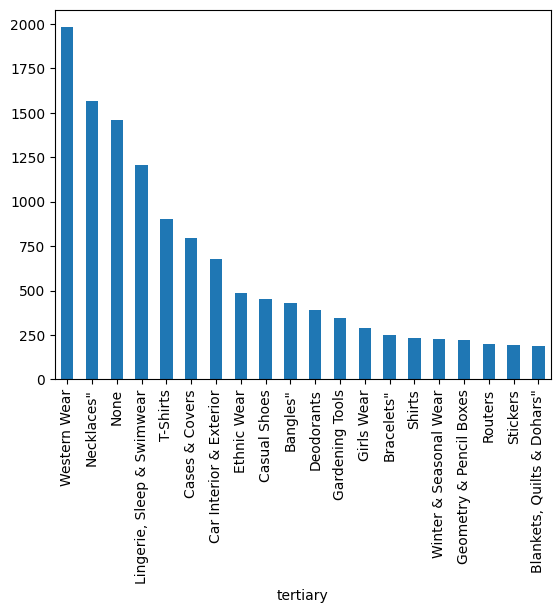

In [78]:
data['tertiary'].value_counts()[:20].plot(kind='bar')

In [79]:
# The max price of product listed on flipkart
data['discounted_price'].max()

571230.0